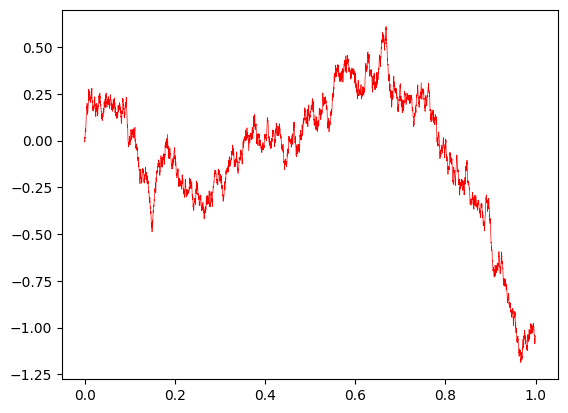

In [8]:
def f():
    W = []
    N = 4000
    T = 1
    W += [0]
    Delta = T/N
    for i in range(1, len(X)):
        W += [(W[i-1]+np.random.normal(0, 1, 1)*sqrt(Delta))[0]]
    return W


X = [i/4000 for i in range(4001)]
W = f()

plt.plot(X,W, color="red",linewidth = 0.5)

In [1]:
from sympy import *
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from math import *

class Trapezoid:

    def trapezoid(self, f, a, b, epsilon):
        eps=epsilon
        count=0
        while eps%10!=0:
            count+=1
            eps*=10
        m = self.find_n(f, a, b, epsilon)
        X = np.arange(a, b + (b - a) / m, (b - a) /m)
        # print(X)
        s = 0
        for i in range(len(X)):
            if (i == 0) or (i == len(X) - 1):
                s += (b - a) / (2 * m) * (self.f(X[i]))
            else:
                s += 2 * (b - a) / (2 * m) * (self.f(X[i]))
        return s

    def dif_func(self, f, n):
        func = diff(f, x, n)
        return func

    def f(self, x):
        return 0.05*x-(x**2-3*x)**2/(2*100*100)

    def max(self, f, a, b):
        X = np.arange(a, b, 0.0001)
        Max_f = self.f(a)
        for i in X:
            if self.f(i) > Max_f:
                Max_f = self.f(i)
        return Max_f

    def find_n(self, f, a, b, epsilon):
        m = symbols('m', real=True)

        n = max(solve((b - a) ** 3 * self.max(self.dif_func(f, 2), a, b) / (12 * m ** 2) - epsilon**2, m))
        # print(n)
        if int(n) < n:
            n = int(n)
            n += 1
        else:
            n = int(n)
        return n

class Monte_Karlo:
    def find_n(self,epsilon,delta):
        return int(1/(4*epsilon**2*delta))+1


    def monte_carlo(self,t,n):
        n=int(n)
        ravn = np.random.uniform(0,t,n)
        s=math.sqrt(t)* np.random.normal(0, 1, 1)/n*np.sum(np.absolute(ravn*ravn - 3*ravn)/100)
        return s


Метод трапеций: [0.0, 0.0062343261718750004, 0.02491466055810079, 0.05604750025000001, 0.09968009873603868, 0.15585945251645267, 0.22459500003342317, 0.31351782922950194, 0.3993597534662653]
Количество итераций метода трапеций: 104
Метод Монте-Карло:  [0.0, 0.01908274616823326, -0.000371074581437755, 0.035841691225415875, 0.004487231731847011, -0.02165336541610956, 0.007654973304302293, 0.03718450496994506]
Количество итераций метода Монте-Каро: 50000
Цена БА: [20.0, 20.512805422689006, 20.496945182049217, 21.924866844862024, 22.195722808277143, 22.872569648761946, 25.228700290821706, 28.401291166799957]
Облигация [20.12507600062094, 20.504552488755184, 21.152958421682442, 22.096348580917407, 23.373238781040794, 25.036312564517985, 27.36459714056941, 29.81739735491096]


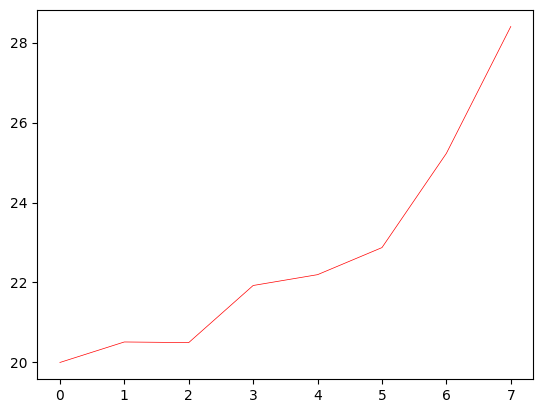

In [2]:
x = symbols('x')
f = 0.05*x-(x**2-3*x)**2/(2*100*100)

T = Trapezoid()
MK=Monte_Karlo()

times = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
Trap=[0.0]
for t in times:
    Trap+=[T.trapezoid(f,0,t,0.01)]

Mont=[0.0]
N=MK.find_n(0.01,0.05)
for j in range(1,8):
    Nj=j/8*N
    Mont+=[MK.monte_carlo(times[j],Nj)[0]]

print('Метод трапеций:',Trap)
print('Количество итераций метода трапеций:',T.find_n(f,0,4,0.01))
print("Метод Монте-Карло: ",Mont)
print('Количество итераций метода Монте-Каро:',MK.find_n(0.01,0.05))

S=[]
for i in range(len(Mont)):
    S+=[20*math.exp(Trap[i]+Mont[i])]

print('Цена БА:',S)

NewTrap=[]
f = 0.05*x
for t in times:
    NewTrap+=[20*math.exp(T.trapezoid(f,0,t,0.01))]

print("Облигация",NewTrap)
plt.plot(S, color="red",linewidth = 0.5)

0.004
0.008
0.012
0.016
0.02
0.024
0.028
0.032
0.036000000000000004
0.04000000000000001
0.04400000000000001
0.048000000000000015
0.05200000000000002
0.05600000000000002
0.060000000000000026
0.06400000000000003
0.06800000000000003
0.07200000000000004
0.07600000000000004
0.08000000000000004
0.08400000000000005
0.08800000000000005
0.09200000000000005
0.09600000000000006
0.10000000000000006
0.10400000000000006
0.10800000000000007
0.11200000000000007
0.11600000000000008
0.12000000000000008
0.12400000000000008
0.12800000000000009
0.1320000000000001
0.1360000000000001
0.1400000000000001
0.1440000000000001
0.1480000000000001
0.1520000000000001
0.1560000000000001
0.16000000000000011
0.16400000000000012
0.16800000000000012
0.17200000000000013
0.17600000000000013
0.18000000000000013
0.18400000000000014
0.18800000000000014
0.19200000000000014
0.19600000000000015
0.20000000000000015
0.20400000000000015
0.20800000000000016
0.21200000000000016
0.21600000000000016
0.22000000000000017
0.224000000000000

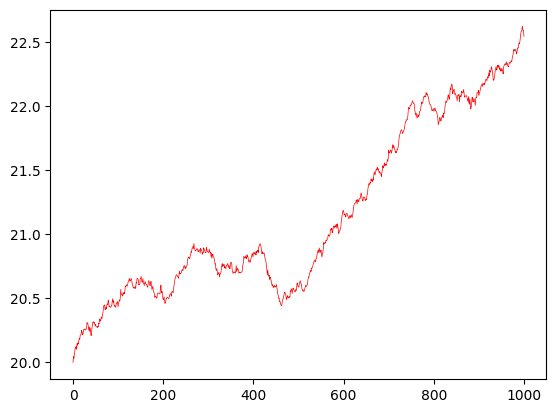

In [3]:

def func(h,St):
    res = 0.05*St*h+abs(t*t-3*t)/100*St*math.sqrt(h)*np.random.normal(0, 1, 1)[0]
    # print(res)
    return res

N=1000
h=4/N
Rk_X=[20]
T=[0]
for i in range(N):
  k1X=(func(0,Rk_X[i]))
  k2X=(func(h/2,Rk_X[i]+k1X/2))
  k3X=(func(h/2,Rk_X[i]+k2X/2))
  k4X=(func(h/2,Rk_X[i]+k3X))
  Rk_X+=[Rk_X[i]+(k1X+2*k2X+2*k3X+k4X)/6]
  T+=[T[i]+h]
  print(T[len(T)-1])

plt.plot(Rk_X, color="red",linewidth = 0.5)

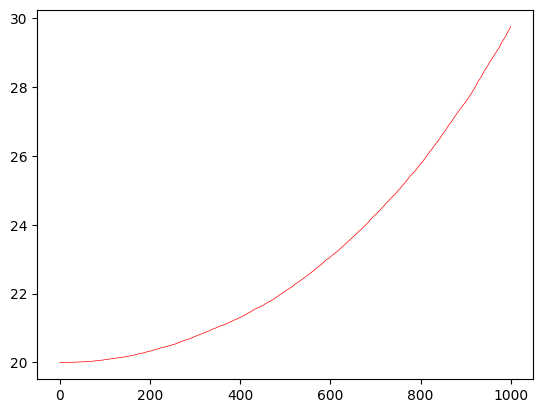

In [4]:

def func(x,St):
    res = 0.05*St*x+abs(t*t-3*t)/100*St*math.sqrt(x)*np.random.normal(0, 1, 1)[0]
    # print(res)
    return res

N=1000
h=4/N
Rk_X=[20]
T=[0]
for i in range(N):
  k1X=h*(func(T[i],Rk_X[i]))
  k2X=h*(func(T[i]+h/2,Rk_X[i]+k1X/2))
  k3X=h*(func(T[i]+h/2,Rk_X[i]+k2X/2))
  k4X=h*(func(T[i]+h/2,Rk_X[i]+k3X))
  Rk_X+=[Rk_X[i]+(k1X+2*k2X+2*k3X+k4X)/6]
  T+=[T[i]+h]

# print(T)
plt.plot(Rk_X, color="red",linewidth = 0.5)

In [5]:
k=0
T=np.round(T,4)
for i in range(len(T)):
    if(T[i] in times):
        print("БА: ",S[k])
        print("Рунге-Кутты: ",Rk_X[i])
        k+=1
        print()


БА:  20.0
Рунге-Кутты:  20.124180491994554

БА:  20.512805422689006
Рунге-Кутты:  20.512442728630003

БА:  20.496945182049217
Рунге-Кутты:  21.15492069026662

БА:  21.924866844862024
Рунге-Кутты:  22.07362668865824

БА:  22.195722808277143
Рунге-Кутты:  23.350186514943925

БА:  22.872569648761946
Рунге-Кутты:  24.99790880564241

БА:  25.228700290821706
Рунге-Кутты:  27.134197048684282

БА:  28.401291166799957
Рунге-Кутты:  29.76709890528927



In [6]:
0.5 in np.round(T,4)


True